<a href="https://colab.research.google.com/github/TAEO2474/python-dev/blob/main/403_Pandas_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

df.plot(kind='') 옵션    

| kind 값                | 그래프 종류             | 설명                                    |
| --------------------- | ------------------ | ------------------------------------- |
| `'line'`              | **선그래프**           | 기본값. 연속형 데이터의 추세를 시각화. x축은 인덱스        |
| `'bar'`               | **수직 막대그래프**       | 범주형 데이터의 값 비교 (ex: 그룹별 평균)            |
| `'barh'`              | **수평 막대그래프**       | `'bar'`의 수평 버전                        |
| `'hist'`              | **히스토그램**          | 연속형 변수의 **분포 확인**, 빈도 기반              |
| `'box'`               | **박스플롯**           | 데이터의 **분포, 중앙값, 이상치** 시각화             |
| `'kde'` / `'density'` | **커널 밀도 추정 (KDE)** | 부드러운 곡선으로 데이터 분포 시각화                  |
| `'area'`              | **면적그래프**          | 선그래프와 유사하나 면적으로 채워짐                   |
| `'pie'`               | **파이차트**           | 범주 비율을 원형으로 표현 (Series 전용)            |
| `'scatter'`           | **산점도**            | 두 연속형 변수 간의 **상관관계** 시각화 (x, y 인자 필요) |
| `'hexbin'`            | **Hexbin 플롯**      | 밀도 기반 산점도 (2D binning), 많은 데이터에 유리    |


In [7]:


#Colab 환경 같은 리눅스 기반에서 나눔폰트 설치 + 캐시 초기화를 해주는 명령
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 실행 후  메뉴에서 런타임 > 세션 다시 시작


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [10]:
#그래프 한글이 안 깨지고 제대로 출력

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')   # 나눔 바른 고딕 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [3]:
# 0. 데이터 준비

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# 데이터 로딩
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # 목표 변수 추가

## 1. 선 그래프(Line Plot)

# drop=True vs drop=False 차이
- drop=False (기본값) 기존 인덱스를 새로운 열로 남긴다
- drop=True 기존 인덱스를 아예 버린다(삭제)

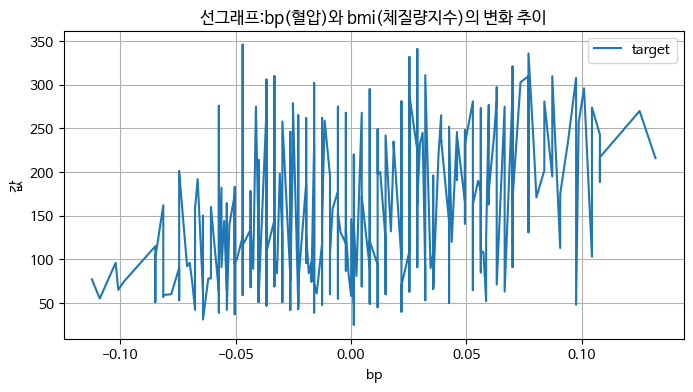

In [18]:
# 선그래프: 혈압(bp)와 질병 진행도(target)를 함께 그리기
#df_sorted = df['bp'].sort_values()  # default ascending=True
df_sorted = df.sort_values(by='bp') # 정렬컬럼기준 by='bp
#print(df_sorted)
df_sorted[['bp', 'target']].reset_index(drop=True).plot(
    title='선그래프:bp(혈압)와 bmi(체질량지수)의 변화 추이', figsize=(8,4), x='bp', y='target')
plt.ylabel('값')
plt.xlabel('bp')
plt.grid(True)
plt.show()

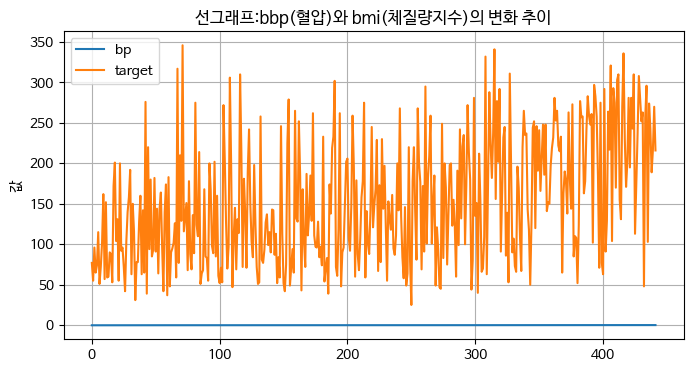

In [17]:
# 선그래프: 혈압(bp)와 질병 진행도(target)를 함께 그리기
#df_sorted = df['bp'].sort_values()  # default ascending=True
df_sorted = df.sort_values(by='bp') # 정렬컬럼기준 by='bp
#print(df_sorted)
df_sorted[['bp', 'target']].reset_index(drop=True).plot(
    title='선그래프:bbp(혈압)와 bmi(체질량지수)의 변화 추이', figsize=(8,4),  kind='line')
plt.ylabel('값')
plt.grid(True)
plt.show()

#df.plot()의 기본 동작은 선그래프이다.
# 두열(bp, target)을 같은 축에서 선형 추제로 시각화

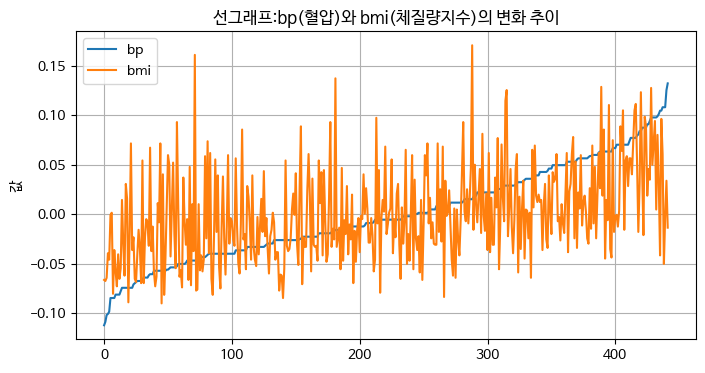

In [13]:
# 선그래프: 혈압(bp)와 질병 진행도(target)를 함께 그리기
#df_sorted = df['bp'].sort_values()  # default ascending=True
df_sorted = df.sort_values(by='bp') # 정렬컬럼기준 by='bp
#print(df_sorted)
df_sorted[['bp', 'bmi']].reset_index(drop=True).plot(
    title='선그래프:bp(혈압)와 bmi(체질량지수)의 변화 추이', figsize=(8,4),  kind='line')
plt.ylabel('값')
plt.grid(True)
plt.show()

#df.plot()의 기본 동작은 선그래프이다.
# 두열(bp, target)을 같은 축에서 선형 추제로 시각화

In [12]:
df.shape

(442, 11)

# 만약 혈압(BP)와 당뇨진행도(Target)의 상관 관계 그래프 를 보고 싶은면?
- 아래와 같이 상관관계 분석하면 된다

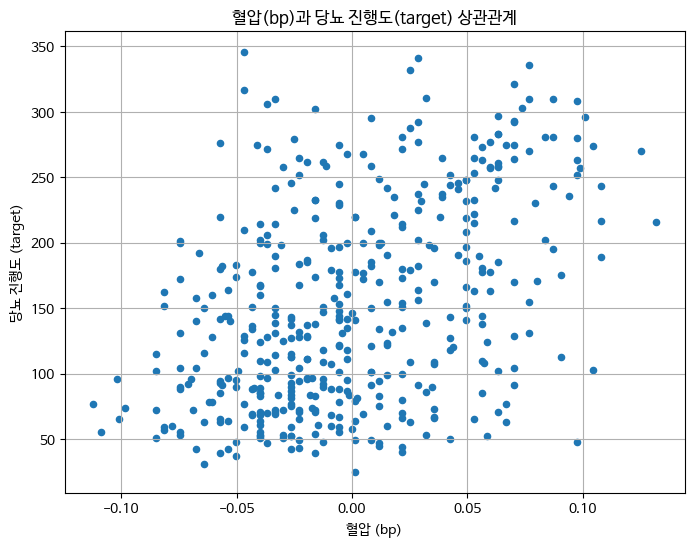

In [11]:
# bp와 target의 상관관계 분석을 위한 산점도 그리기
df.plot(kind='scatter', x='bp', y='target', title='혈압(bp)과 당뇨 진행도(target) 상관관계', figsize=(8, 6))
plt.xlabel('혈압 (bp)')
plt.ylabel('당뇨 진행도 (target)')
plt.grid(True)
plt.show()

In [14]:
## 2. 막대그래프(Bar Plot)

## ✅ "분위수별로 나눈다"는 뜻?

*분위수(Quantile)*는 데이터를 작은 값부터 큰 값까지 나눠서 *구간을 자르는 기준*

| 분위수 | 뜻         | 설명                          |
|--------|------------|-------------------------------|
| 0.25   | 1사분위수 (Q1) | 전체 데이터의 하위 25% 지점      |
| 0.50   | 2사분위수 (Q2) | 중앙값 (전체의 가운데 값)        |
| 0.75   | 3사분위수 (Q3) | 전체 데이터의 상위 25% 경계선     |

---

###  쉽게 말해…

`bmi` 값을 작은 것부터 큰 것까지 정렬해서  
**예: 4등분(사분위수)** 하면 다음과 같은 그룹이 됩니다:

- **첫 번째 구간:** 가장 마른 사람들 (하위 25%)
- **두 번째 구간:** 평균보다 약간 낮은 체형
- **세 번째 구간:** 평균보다 약간 높은 체형
- **네 번째 구간:** 가장 체중이 높은 사람들 (상위 25%)

---

## ✅ 왜 이렇게 나누는가?

**각 구간별로 당뇨 진행도(`target`)의 평균을 비교**해 보려는 목적입니다.

예를 들어:

| BMI 분위수 그룹         | 평균 당뇨 진행도 (target) |
|------------------------|---------------------------|
| 하위 25% (마른 편)     | 110                       |
| 중간                   | 130                       |
| 상위 25% (과체중)       | 170                       |

👉 이렇게 보면 *BMI가 높을수록 당뇨 진행도도 높다*는 경향을 시각적으로 확인할 수 있어요.


/tmp/ipython-input-20-989419618.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_group = df.groupby('bmi_bin')['target'].mean()   # select mean(target) from diabetes group by df


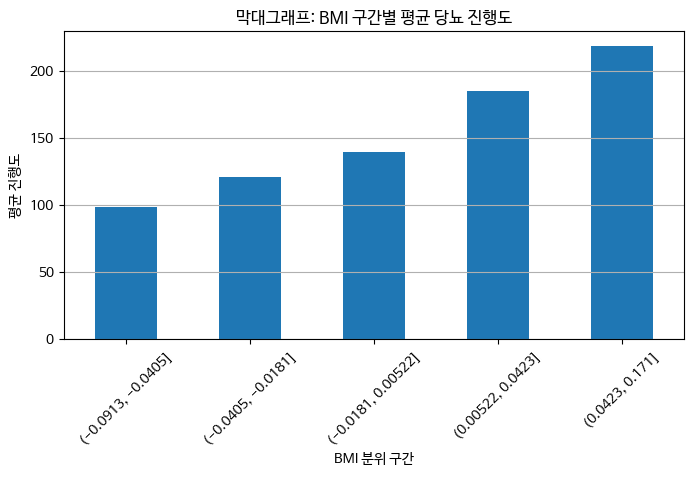

In [20]:
# 평균을 보기 위해 bmi를 분위수별로 나눠서 막대그래프로 시각화
df['bmi_bin'] = pd.qcut(df['bmi'], 5)
#print(df.head(3))
bmi_group = df.groupby('bmi_bin')['target'].mean()   # select mean(target) from diabetes group by df
bmi_group.plot(kind='bar', title='막대그래프: BMI 구간별 평균 당뇨 진행도', figsize=(8, 4))
plt.ylabel("평균 진행도")
plt.xlabel("BMI 분위 구간")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## 3. 히스토그램(Histogram)

- 히스토그램은 *연속형 데이터의 분포(퍼짐)*를 시각화할 때 사용하는 *막대 그래프의 일종*입니다.  
- 데이터를 *구간(bin)*으로 나누고, 각 구간에 해당하는 데이터의 개수를 세어 *막대 높이*로 표현합니다.


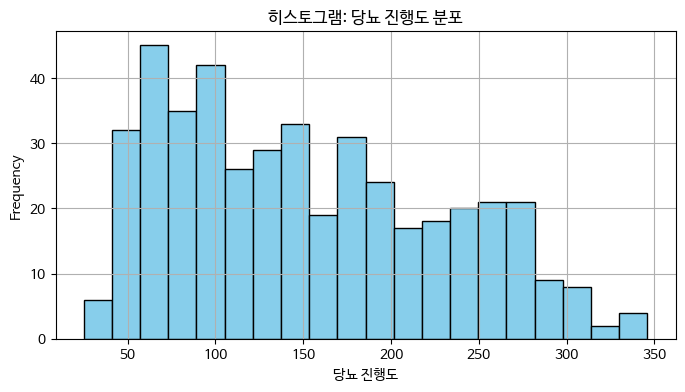

In [22]:

# target 변수 분포 확인
df['target'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black',
                  title='히스토그램: 당뇨 진행도 분포', figsize=(8, 4))
plt.xlabel("당뇨 진행도")
plt.grid(True)
plt.show()

## 4. 산점도(Scatter Plot)
- 산점도는 두 *연속형 변수 간의 관계*를 시각화할 때 사용하는 그래프입니다.  
각 데이터를 *x축과 y축 좌표에 따라 점(●)*으로 찍어서  
두 변수 사이의 *경향, 패턴, 관계(선형성 등)*을 파악할 수 있게 해줍니다.

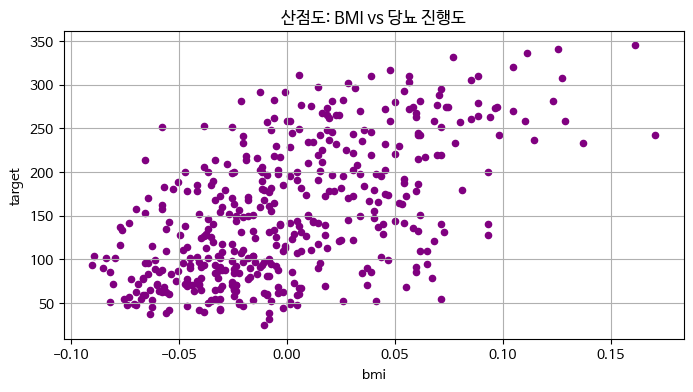

In [27]:
# 산점도는 kind='scatter'로 x, y 축을 명시해야 함
df.plot(kind='scatter', x='bmi', y='target',
        title='산점도: BMI vs 당뇨 진행도', figsize=(8, 4), color='purple')
plt.grid(True)
plt.show()





In [31]:
print(df)

# 모든 컬럼을 한 줄에 출력하도록 설정
pd.set_option('display.expand_frame_repr', False)

# 필요시 컬럼 개수도 충분히 보이도록 설정
pd.set_option('display.max_columns', None)


          age       sex       bmi        bp        s1        s2        s3        s4        s5        s6  target             bmi_bin
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401 -0.002592  0.019907 -0.017646   151.0     (0.0423, 0.171]
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412 -0.039493 -0.068332 -0.092204    75.0  (-0.0913, -0.0405]
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356 -0.002592  0.002861 -0.025930   141.0     (0.0423, 0.171]
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038  0.034309  0.022688 -0.009362   206.0  (-0.0181, 0.00522]
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142 -0.002592 -0.031988 -0.046641   135.0  (-0.0405, -0.0181]
..        ...       ...       ...       ...       ...       ...       ...       ...       ...       ...     ...                 ...
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674 -0

## 이상치(Outlier)

### ✅ 정의
이상치는 **데이터 중에서 다른 값들과 확연히 다르게 벗어난 값**을 말해요.  
즉, 전체 데이터의 일반적인 패턴에서 벗어난 ‘튀는’ 값입니다.
4차원인 애들 ㅋㅋㅋ

---

### ✅ 특징

| 항목           | 설명                                   |
|----------------|--------------------------------------|
| 위치           | 데이터 분포의 가장자리 또는 멀리 떨어진 점 |
| 영향           | 분석 결과를 왜곡하거나 신뢰도를 떨어뜨릴 수 있음 |
| 원인           | 입력 오류, 측정 오류, 특이한 상황 등    |

---

### ✅ 예시

- 키가 150~180cm인 학생들 중에 210cm인 학생이 있다면 이 값은 이상치일 수 있어요.
- 자동차 주행 거리 데이터에서 대부분 1,000~20,000km인데 300,000km인 값이 이상치입니다.

---

### ✅ 이상치가 문제인 이유

- 평균값 등 통계량이 크게 변할 수 있음
- 모델 학습 시 성능 저하 및 잘못된 예측 가능성
- 데이터 해석을 어렵게 만듦

---

### ✅ 이상치 탐지 방법 예시

- **박스 플롯(Box Plot)**: 사분위수를 이용해 이상치를 시각적으로 확인  
- **통계적 기준**: 보통 Q1 - 1.5×IQR 이하 또는 Q3 + 1.5×IQR 이상인 값  
- **시각화**: 산점도에서 눈에 띄게 떨어진 점들

---

### ✅ 박스 플롯으로 이상치 확인 (예시 코드)

```python
import matplotlib.pyplot as plt
import pandas as pd

# 예시 데이터
data = [10, 12, 12, 13, 14, 15, 18, 19, 100]  # 100이 이상치 가능성

plt.boxplot(data)
plt.title("박스 플롯을 통한 이상치 확인")
plt.show()


# 5. 박스플롯(Box Plot)
박스플롯은 데이터 분포의 **중앙값, 사분위수, 이상치** 등을 한눈에 보여주는 그래프.  
데이터의 **산포(흩어짐 정도)**와 **대략적인 분포 형태**를 파악할 때 아주 유용

In [ ]:
# 여러 특성의 분포를 한 번에 박스플롯으로 보기
df[['bmi', 'bp', 's1', 's2', 's3', 's4', 's5']].plot(kind='box', figsize=(10, 6),
                                                              title='박스플롯: 주요 변수들의 분포')
plt.grid(True)
plt.show()

# 여러 열에 대한 분포, 중앙값, 이상치를 한 번에 비교
# .plot(kind='box')는 수치형 데이터 요약에 유용함.
# 가운데 50%는 중앙값을 의미한다.
# 박스 크기가 크면 데이터가 넓게 퍼져 있음을 의미하고, 작으면 집중되여 있음을 의미한다.
# 중앙값(50%) 선 위치로 각 변수의 중앙값 차이를 알 수 있다.
# 이상치가 많으면 해당 변수에 특이한 값들이 존재한다는 뜻이다.
